### create dataset

In [28]:
import pandas as pd
import random
import numpy as np
from datetime import datetime, timedelta

def generate_contributor_data(num_sessions=500, num_contributors=30, seed=42):
    """
    Generates a synthetic dataset where each row represents a single 'session'
    from a contributor labeling data.

    :param num_sessions: Total number of rows (sessions) to generate
    :param num_contributors: Unique contributors in the system
    :param seed: Random seed for reproducibility
    :return: A pandas DataFrame with synthetic contributor data
    """

    random.seed(seed)
    np.random.seed(seed)

    # -- Basic setup for random data generation --
    # We'll define some plausible category choices and distributions.
    contributors = [f"C{i+1}" for i in range(num_contributors)]
    region_choices = ["USA", "APAC", "EMEA", "LATAM"]
    platform_choices = ["Project A", "Project B", "Project C", "Project D"]
    difficulty_choices = ["easy", "medium", "hard"]
    task_type_choices = ["text_labeling", "image_bounding", "3d_point_cloud", "video_labeling"]

    # We'll assign a random 'join_date' to each contributor between 2022-01-01 and 2023-12-31
    start_2022 = datetime(2022, 1, 1)
    end_2023 = datetime(2023, 12, 31)

    def random_date(start, end):
        """Generate a random datetime between two datetime objects."""
        delta = end - start
        rand_days = random.randint(0, delta.days)
        return start + timedelta(days=rand_days)

    contributor_join_dates = {
        c: random_date(start_2022, end_2023) for c in contributors
    }

    # We track 'cumulative_hours_worked' for each contributor across sessions
    cumulative_hours = {c: 0.0 for c in contributors}

    data = []

    # We'll generate sessions in the year 2023 for simplicity
    start_2023 = datetime(2023, 1, 1)
    end_2023_dt = datetime(2023, 12, 31)

    for session_id in range(1, num_sessions + 1):
        # 1) Pick a random contributor
        c = random.choice(contributors)

        # 2) Generate a random start time within 2023
        delta_days = (end_2023_dt - start_2023).days
        session_start = start_2023 + timedelta(
            days=random.randint(0, delta_days),
            hours=random.randint(0, 23),
            minutes=random.randint(0, 59)
        )

        # 3) Random session length in minutes (20 to 180 minutes)
        session_length = random.randint(20, 180)
        session_end = session_start + timedelta(minutes=session_length)

        # 4) Tasks completed in this session
        tasks_completed = random.randint(20, 100)

        # 5) Average correctness score for all tasks in this session
        avg_label_correctness_score = round(random.uniform(0.4, 1.0), 3)

        # 6) Benchmark tasks used (0-5), but not more than tasks_completed
        benchmark_tasks_used = random.randint(0, 5)
        benchmark_tasks_used = min(benchmark_tasks_used, tasks_completed)

        # 7) Benchmark accuracy (slightly correlated with avg_label_correctness_score)
        benchmark_accuracy = round(
            avg_label_correctness_score + random.uniform(-0.1, 0.1), 3
        )
        benchmark_accuracy = max(0.0, min(1.0, benchmark_accuracy))  # clamp 0-1

        # 8) Time per task (seconds)
        time_per_task = (session_length * 60) / tasks_completed

        # 9) Update contributor's cumulative hours
        cumulative_hours[c] += session_length / 60.0

        # 10) Additional metadata
        region = random.choice(region_choices)
        platform = random.choice(platform_choices)
        difficulty = random.choice(difficulty_choices)
        task_type = random.choice(task_type_choices)
        onboarding_completed = (random.random() < 0.7)  # ~70% chance
        join_date = contributor_join_dates[c]

        # 11) Relabel stats & cost
        relabeled_count = random.randint(0, 5)
        relabel_cost = round(relabeled_count * random.uniform(0.5, 1.5), 2)

        # 12) Payment/payout to contributor
        payout = round(tasks_completed * random.uniform(0.05, 0.2), 2)

        # Construct the row
        row = {
            "session_id": session_id,
            "contributor_id": c,
            "start_time": session_start,
            "end_time": session_end,
            "tasks_completed": tasks_completed,
            "avg_label_correctness_score": avg_label_correctness_score,
            "benchmark_tasks_used": benchmark_tasks_used,
            "benchmark_accuracy": benchmark_accuracy,
            "time_per_task": round(time_per_task, 2),
            "cumulative_hours_worked": round(cumulative_hours[c], 2),
            "task_difficulty_level": difficulty,
            "task_type": task_type,
            "onboarding_completed": onboarding_completed,
            "join_date": join_date,
            "relabeled_count": relabeled_count,
            "relabel_cost": relabel_cost,
            "payout": payout,
            "platform": platform,
            "region": region
        }
        data.append(row)

    # Convert to DataFrame
    df = pd.DataFrame(data)
    return df

# Example usage: generate a dataset with 1000 sessions and preview
df = generate_contributor_data(num_sessions=1000, num_contributors=50, seed=42)
print(df.head(10))
print("\nDataFrame shape:", df.shape)
print("\nColumn Info:")
print(df.info())


   session_id contributor_id          start_time            end_time  \
0           1            C35 2023-03-05 12:05:00 2023-03-05 14:46:00   
1           2            C15 2023-02-21 12:17:00 2023-02-21 14:33:00   
2           3            C41 2023-12-19 17:14:00 2023-12-19 18:57:00   
3           4            C42 2023-09-13 12:56:00 2023-09-13 15:13:00   
4           5             C4 2023-02-26 04:40:00 2023-02-26 05:40:00   
5           6            C18 2023-11-25 10:07:00 2023-11-25 11:42:00   
6           7            C13 2023-03-20 11:48:00 2023-03-20 12:49:00   
7           8            C37 2023-02-10 02:46:00 2023-02-10 05:10:00   
8           9            C35 2023-12-20 06:45:00 2023-12-20 08:24:00   
9          10            C15 2023-01-04 02:45:00 2023-01-04 03:20:00   

   tasks_completed  avg_label_correctness_score  benchmark_tasks_used  \
0               57                        0.898                     4   
1               66                        0.498              

# data analysis

In [59]:
import matplotlib.pyplot as plt

# df.describe()
df.head(3)

,session_id,contributor_id,start_time,end_time,tasks_completed,avg_label_correctness_score,benchmark_tasks_used,benchmark_accuracy,time_per_task,cumulative_hours_worked,task_difficulty_level,task_type,onboarding_completed,join_date,relabeled_count,relabel_cost,payout,platform,region
0,1,C35,2023-03-05 12:05:00,2023-03-05 14:46:00,57,0.898,4,0.975,169.47,2.68,hard,text_labeling,True,2023-03-09,1,1.27,11.27,Project B,EMEA
1,2,C15,2023-02-21 12:17:00,2023-02-21 14:33:00,66,0.498,2,0.440,123.64,2.27,hard,image_bounding,True,2022-01-31,1,0.66,7.06,Project A,EMEA
2,3,C41,2023-12-19 17:14:00,2023-12-19 18:57:00,27,0.537,0,0.598,228.89,1.72,easy,image_bounding,False,2022-04-15,4,5.51,2.62,Project C,LATAM


### Identifying Low-Quality Contributors
**“We have a dataset of contributor activities (ID, timestamps, tasks completed, quality scores, etc.). How would you detect contributors who consistently produce low-quality labels?”**

1. define what low quality means. Set threshold
2. aggregate results by contributors
3. get average error rate on benchmarks for the last 12 weeks
4. display all contributors in histogram with error rate higher than threshold


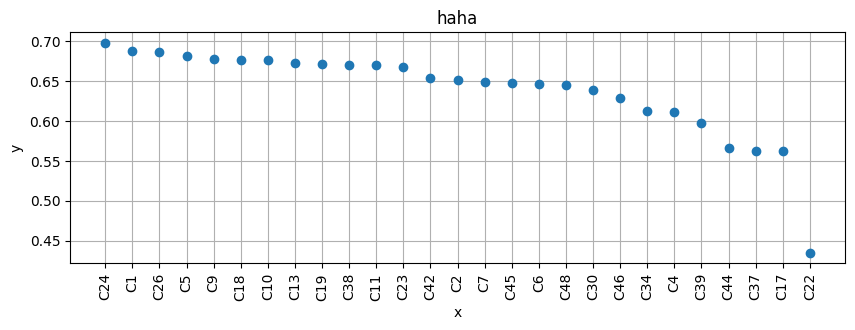

In [99]:
threshold = 0.70
start_time = pd.to_datetime('2023-10-01')

recents = df[df['start_time'] > start_time]
aggregated = recents.groupby('contributor_id')['benchmark_accuracy'].mean().sort_values(ascending=False)
aggregated = aggregated[aggregated < threshold]

plt.figure(figsize=(10, 3))
# plt.bar(aggregated.index, aggregated.values)
plt.xticks(rotation=90)
# plt.subplots_adjust(right=2)
plt.title("haha")
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

plt.plot(aggregated, marker='o', linestyle='')


# fig1, ax1 = plt.subplots()
# ax1.plot([1, 2, 3], [4, 5, 6])
# ax1.set_title('Figure 1')

# # Create the second figure and axes
# fig2, ax2 = plt.subplots()
# ax2.plot([1, 2, 3], [4, 5, 6])
# ax2.set_title('Figure 2')

plt.show()


### Other Questions
2. Handling Contributor Drift Over Time
“Contributors often start strong but their quality drops after a few hours. Using our time-stamped dataset, how would you quantify this drift and propose a solution?”

3. Improving Benchmark Task Coverage
“We rely on hidden ‘golden tasks’ to monitor contributor accuracy, but we suspect coverage is uneven. Using historical data of labeled and benchmark tasks, how would you measure coverage and propose improvements?”

4. Scalable Onboarding of New Contributors
“We have logs of new contributors and want to see if an initial training module or ‘probation phase’ helps them ramp up faster. How would you measure success using the dataset of contributor performance?”

5. Measuring ROI of Contributor Improvements
“If we invest in training or better tooling for contributors, how do we measure the ROI given we have data on re-labeling costs, error rates, and throughput?”
